In [11]:
import numpy as np
from tqdm import tqdm
from librosa.sequence import dtw

#import pyvista as pv
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
facies = np.zeros((318, 256, 256, 128))
for i in tqdm(range(318)):
    facies[i] = np.load('data/facies/facies_{}.npy'.format(i))
print('Facies: {}'.format(facies.shape))

100%|██████████| 318/318 [01:11<00:00,  4.44it/s]

Facies: (318, 256, 256, 128)


In [3]:
sample = 255
d = facies[sample]
print('Sample: {}'.format(sample))

Sample: 255


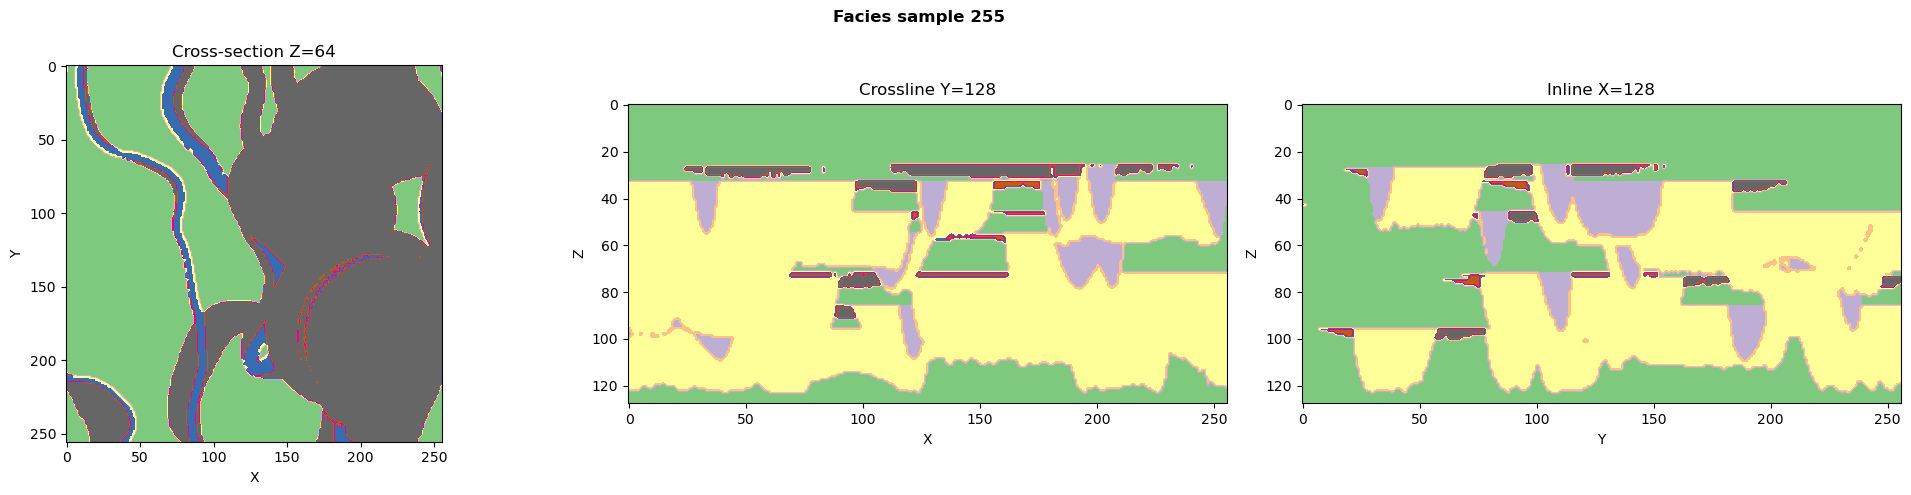

In [60]:
cmap, interp = 'Accent', 'bicubic'
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.imshow(d[:,:,64], cmap=cmap, interpolation=interp)
plt.title('Cross-section Z=64')
plt.xlabel('X'); plt.ylabel('Y')

plt.subplot(132)
plt.imshow(d[:,128,:].T, cmap=cmap, interpolation=interp)
plt.title('Crossline Y=128')
plt.xlabel('X'); plt.ylabel('Z')

plt.subplot(133)
plt.imshow(d[128,:,:].T, cmap=cmap, interpolation=interp)
plt.title('Inline X=128')
plt.xlabel('Y'); plt.ylabel('Z')

plt.suptitle('Facies sample {}'.format(sample), weight='bold')
plt.tight_layout()
plt.show()

In [5]:
# ### 3D Visualization ###
# p = pv.Plotter()
# mesh = pv.wrap(np.flip(d))

# m1 = mesh.slice_orthogonal()
# p.add_mesh(m1, cmap=cmap)

# p.show(jupyter_backend='static')

In [56]:
nw = 5

wx, wy = np.random.randint(7, 250, size=(2,nw))
well_log = d[wy, wx, :]
noise_log = d[wy, wx, :] + np.random.normal(0, 0.25*d.std(), d.shape[-1])
depth = np.arange(d.shape[-1]) + 1000

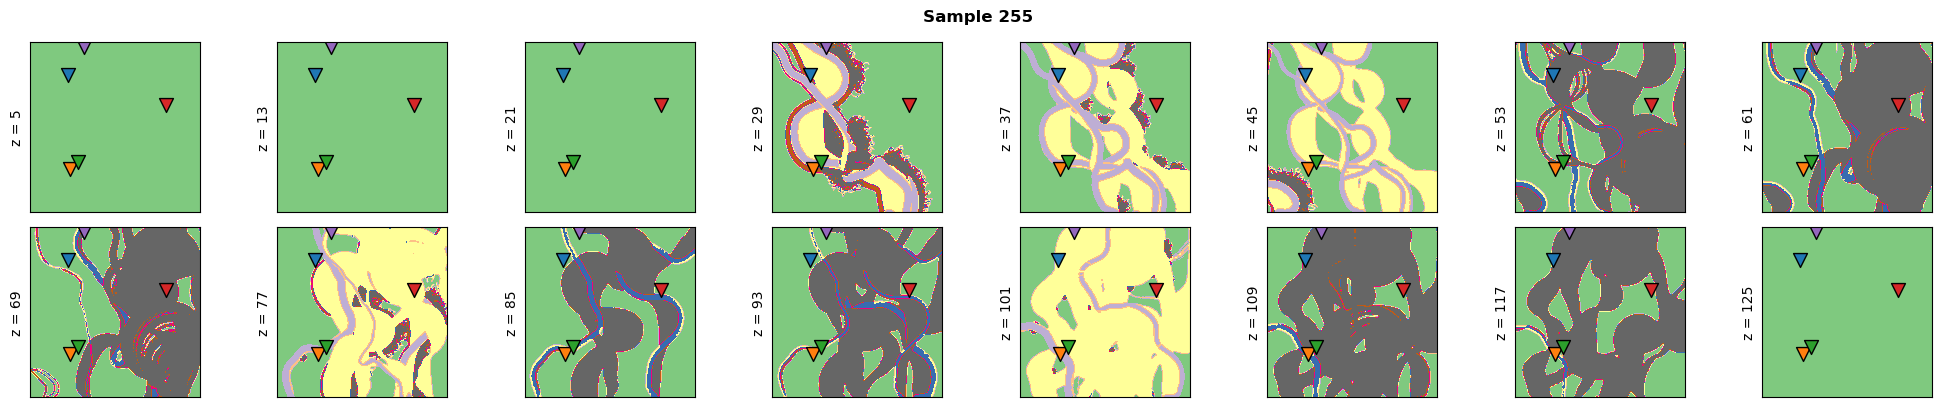

In [61]:
plt.figure(figsize=(20,6))
for i in range(16):
    plt.subplot(3, 8, i+1)
    k = i * 8 + 5
    plt.imshow(d[...,k], cmap=cmap, interpolation=interp)
    [plt.scatter(wx[i], wy[i], marker='v', edgecolor='k', c='C{}'.format(i), s=100) for i in range(nw)]
    plt.xticks([]); plt.yticks([])
    plt.ylabel('z = {}'.format(k))
plt.suptitle('Sample {}'.format(sample), weight='bold')
plt.tight_layout()
plt.show()

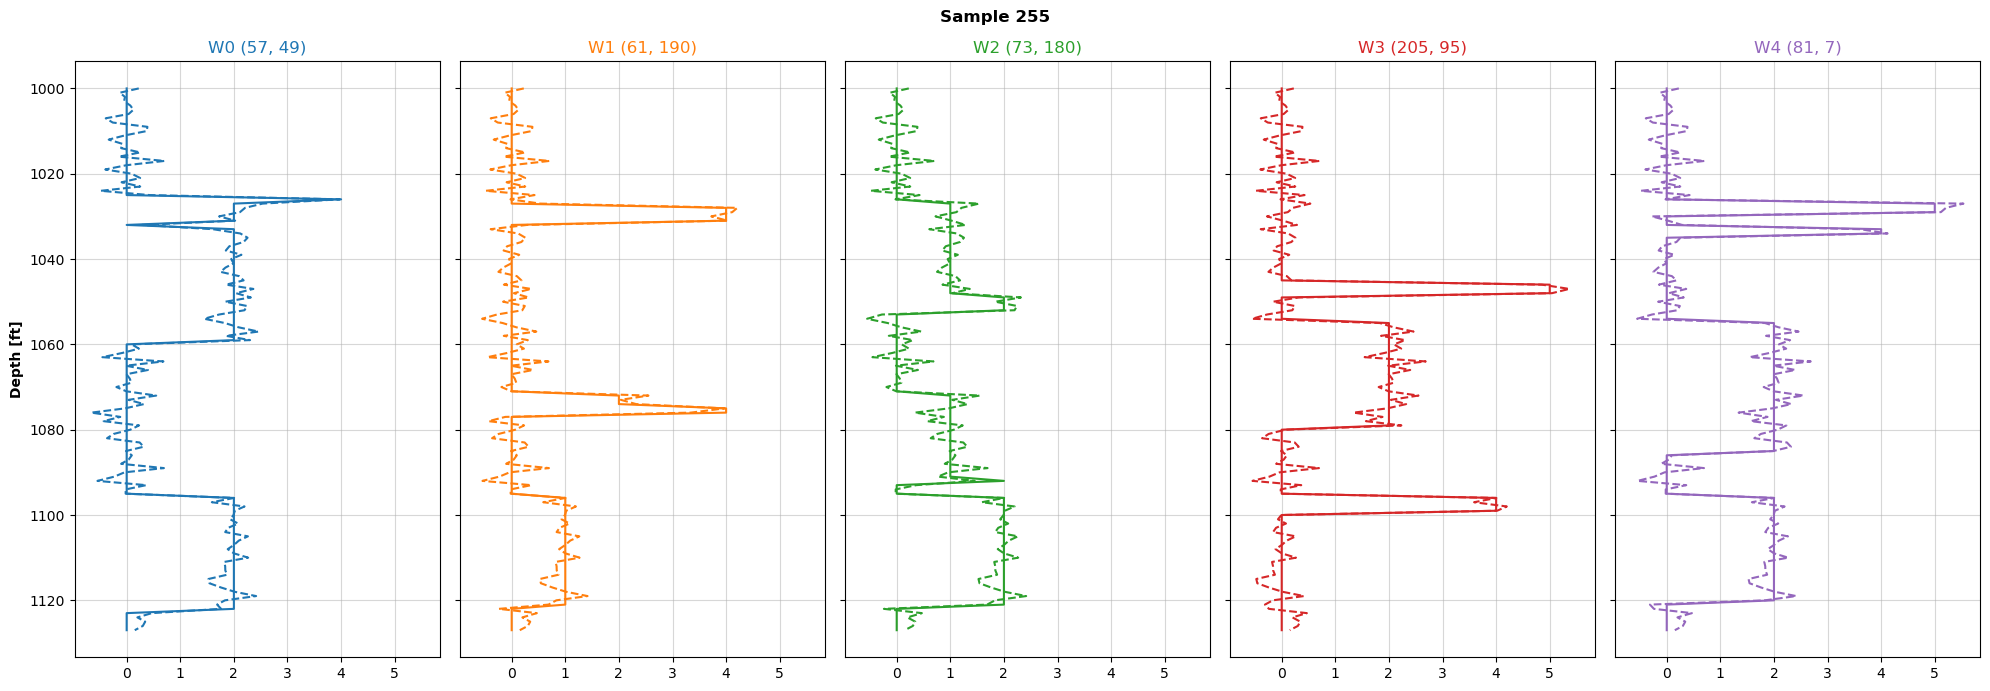

In [58]:
fig, axs = plt.subplots(1, nw, figsize=(20, 7), sharex=True, sharey=True)
for i, (x, y) in enumerate(zip(wx, wy)):
    axs[i].plot(well_log[i], depth, c='C{}'.format(i))
    axs[i].plot(noise_log[i], depth, c='C{}'.format(i), ls='--')
    axs[i].set_title('W{} ({}, {})'.format(i, x, y), color='C{}'.format(i))
    axs[i].grid(True, which='both', alpha=0.5)
    #axs[i].set(xticks=np.arange(6), xticklabels=np.arange(6), xlabel='Facies (rock class)')
axs[0].invert_yaxis()
axs[0].set_ylabel('Depth [ft]', weight='bold')
plt.suptitle('Sample {}'.format(sample), weight='bold')
plt.tight_layout()
plt.show()

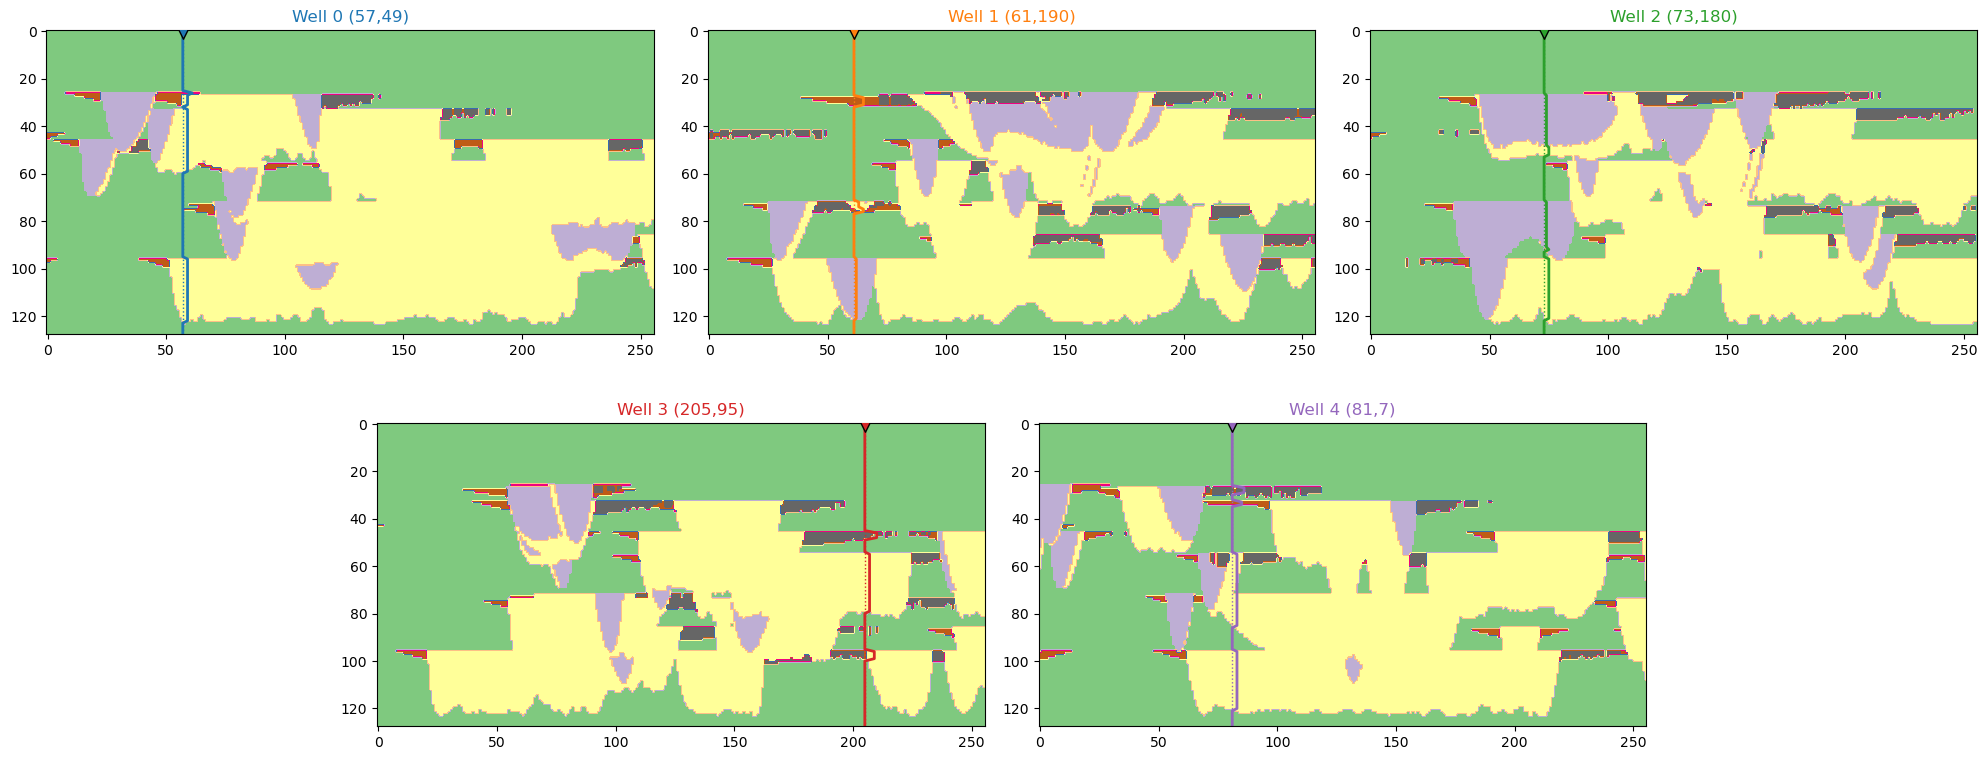

In [59]:
fig = plt.figure(figsize=(20, 8))
gs = GridSpec(2, 6, figure=fig)
ax1 = fig.add_subplot(gs[0, :2]) 
ax2 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[0, 4:])
ax4 = fig.add_subplot(gs[1, 1:3])
ax5 = fig.add_subplot(gs[1, 3:5])
axs = [ax1, ax2, ax3, ax4, ax5]

for i, ax in enumerate(axs):
    ax.set_title('Well {} ({},{})'.format(i, wx[i], wy[i]), color='C{}'.format(i))
    ax.imshow(d[wy[i]].T, cmap='Accent')
    ax.scatter(wx[i], 0, c='C{}'.format(i), marker='v', edgecolor='k', s=125, zorder=9)
    ax.plot(np.repeat(wx[i], 128), np.arange(128), c='C{}'.format(i), lw=1, ls=':')
    ax.plot(np.repeat(wx[i], 128)+well_log[i], np.arange(128), c='C{}'.format(i), lw=2)
plt.tight_layout()
plt.show()

***
# END